### Install and Import Dependencies

In [ ]:
#!pip install xgboost==1.0.1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy import asarray
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
# Importing the libraries
from sklearn.metrics import confusion_matrix
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np
import random
from sklearn.preprocessing import MinMaxScaler

# 1.Head classification


In [ ]:
# Importing the dataset
df1 = pd.read_csv('/content/drive/MyDrive/paper 3 siham/data/data2_head.csv', sep = ',')
df1 = df1.iloc[: , 1:]
df1 = df1.sample(frac = 1)
df1.head(3)


,yaw,pitch,roll,label
107,10.038645,5.886218,10.269459,1.0
74,14.774715,5.879225,8.326688,1.0
366,12.625806,-10.813173,1.635495,0.0


In [ ]:
df1.describe()

,yaw,pitch,roll,label
count,448.000000,448.000000,448.000000,448.000000
mean,10.554577,-1.042163,4.868832,0.542411
std,14.335998,9.495555,5.064903,0.498755
min,-35.839340,-29.595852,-14.229896,0.000000
25%,3.456158,-9.592144,1.461968,0.000000
50%,12.494120,1.822347,5.626391,1.000000
75%,18.170913,6.417931,8.828966,1.000000
max,58.648048,27.112610,17.870573,1.000000


In [ ]:
df1['label']

107    1.0
74     1.0
366    0.0
313    0.0
400    0.0
      ... 
340    0.0
258    0.0
281    0.0
117    1.0
239    1.0
Name: label, Length: 448, dtype: float64

<Axes: >

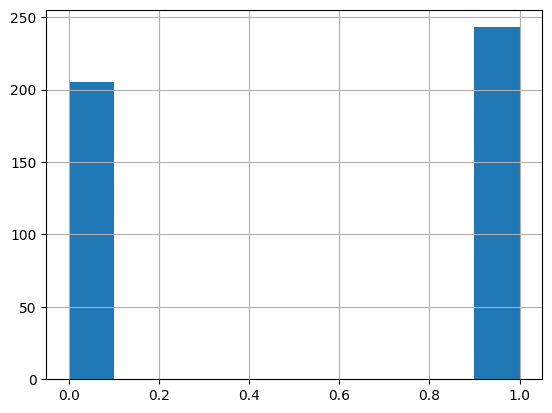

In [ ]:
# Histograms
df1["label"].hist()

In [ ]:
X1 = df1.iloc[:, :3].values
y1 = df1.iloc[:, 3:4].values


In [ ]:
X1

array([[ 10.03864479,   5.88621807,  10.26945877],
       [ 14.77471542,   5.87922478,   8.32668781],
       [ 12.62580585, -10.81317329,   1.63549459],
       ...,
       [ -1.17966413,   3.76294947,   5.63543224],
       [  9.81436825,   6.53833675,   7.06794548],
       [ 24.19004059,  -4.68908024,   7.64569855]])

In [ ]:
# Min-Max scaling for features
scaler = MinMaxScaler()
X1= scaler.fit_transform(X1)

# Display the scaled features
print("Scaled Features:")
print(pd.DataFrame(X1, columns=df1.columns[:3]))

Scaled Features:
          yaw     pitch      roll
0    0.485546  0.625693  0.763209
1    0.535670  0.625569  0.702687
2    0.512927  0.331215  0.494242
3    0.554179  0.539742  0.600760
4    0.748273  0.670002  0.660328
..        ...       ...       ...
443  0.409104  0.279579  0.339388
444  0.758558  0.521686  0.333072
445  0.366818  0.588251  0.618849
446  0.483173  0.637192  0.663474
447  0.635316  0.439207  0.681473

[448 rows x 3 columns]


In [ ]:
y1

array([[1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],

In [ ]:


# Splitting the dataset into the Training set and Test set
X_train1, X_test1, y_train1, y_test1 = train_test_split(
	X1, y1, test_size=0.3, random_state=0)

# Fitting XGBoost to the training data
import time
t1=time.time()
my_model1 = xgb.XGBClassifier()
my_model1.fit(X_train1, y_train1)
t2= time.time()
temps_execution = t2 - t1
print(f"Le temps d'exécution est de {temps_execution} secondes.")

# Predicting the Test set results
t3=time.time()
y_pred1 = my_model1.predict(X_test1)
t4= time.time()
temps_execution = t4- t3
print(f"Le temps d'exécution est de {temps_execution} secondes.")

# Making the Confusion Matrix
cm1= confusion_matrix(y_test1, y_pred1)


Le temps d'exécution est de 0.48446226119995117 secondes.
Le temps d'exécution est de 0.009303092956542969 secondes.


In [ ]:
cm1

array([[46, 11],
       [24, 54]])

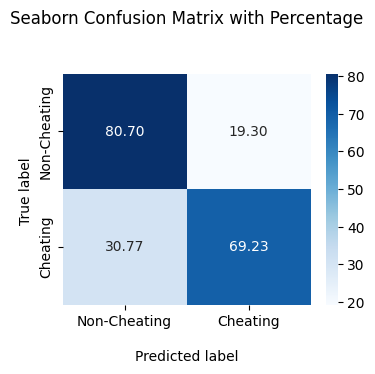

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have y_test1 and y_pred1 defined
f,ax = plt.subplots(figsize=(4,3))
# Generate the confusion matrix
cm1 = confusion_matrix(y_test1, y_pred1)

# Calculate the percentages
cm1_percent = cm1 / cm1.sum(axis=1)[:, np.newaxis] * 100

# Create the heatmap
ax = sns.heatmap(cm1_percent, annot=True, cmap=plt.cm.Blues, fmt='.2f')

# Set the title and labels
ax.set_title('Seaborn Confusion Matrix with Percentage\n\n')
ax.set_xlabel('\nPredicted label')
ax.set_ylabel('True label ')

# Set tick labels
ax.xaxis.set_ticklabels(['Non-Cheating', 'Cheating'])
ax.yaxis.set_ticklabels(['Non-Cheating', 'Cheating'])

# Display the visualization of the Confusion Matrix with percentage
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test1, y_pred1))

0.7407407407407407


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train1, my_model1.predict(X_train1)))

1.0


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
print("precision=",precision_score(y_test1, y_pred1),",","recall=",recall_score(y_test1, y_pred1),",","f1_score=",f1_score(y_test1, y_pred1))

precision= 0.8307692307692308 , recall= 0.6923076923076923 , f1_score= 0.7552447552447553


Specificity in Python

In [ ]:
true_negatives1 = cm1[0, 0]
false_positives1 = cm1[0, 1]
print('specificity=',true_negatives1 / (true_negatives1 + false_positives1))

specificity= 0.8070175438596491


# 2.Eyes Classification

In [ ]:
# Importing the dataset
df2 = pd.read_csv('/content/drive/MyDrive/paper 3 siham/data/data2_eyes.csv', sep = ',')
print(df2)

      Unnamed: 0  a_leftPupilPoint  b_leftPupilPoint  a_rightPupilPoint  \
0              0               499               352                643   
1              1               501               353                646   
2              2               453               213                585   
3              3               631               480                738   
4              4               387               367                504   
...          ...               ...               ...                ...   
4488        2774               450               452                562   
4489        2775               451               450                561   
4490        2776               578               417                671   
4491        2777               465               375                591   
4492        2778               520               406                625   

      b_rightPupilPoint  label  
0                   354      1  
1                   356      1  


In [ ]:
df2 = df2.iloc[: , 1:]
df2 = df2.sample(frac = 1)
print(df2)

      a_leftPupilPoint  b_leftPupilPoint  a_rightPupilPoint  \
3957               365               418                480   
26                 378               349                496   
1172               484               233                607   
208                416               290                553   
2115               409               297                567   
...                ...               ...                ...   
4452               378               316                501   
2371               509               310                683   
1346               523               287                651   
3878               345               545                456   
3710               524               237                652   

      b_rightPupilPoint  label  
3957                398      0  
26                  367      1  
1172                229      1  
208                 297      1  
2115                308      0  
...                 ...    ...  
4452        

In [ ]:
X2 = df2.iloc[:, :4].values
y2 = df2.iloc[:, 4:].values

In [ ]:
X2

array([[540, 287, 665, 285],
       [400, 308, 553, 310],
       [616, 394, 719, 402],
       ...,
       [507, 282, 659, 277],
       [470, 282, 601, 266],
       [420, 139, 547, 135]])

In [ ]:
# Min-Max scaling for features
scaler = MinMaxScaler()
X2= scaler.fit_transform(X2)

# Display the scaled features
print("Scaled Features:")
print(pd.DataFrame(X2, columns=df2.columns[:4]))

Scaled Features:
      a_leftPupilPoint  b_leftPupilPoint  a_rightPupilPoint  b_rightPupilPoint
0             0.327470          0.620843           0.328035           0.594298
1             0.345061          0.467849           0.351156           0.526316
2             0.488498          0.210643           0.511561           0.223684
3             0.396482          0.337029           0.433526           0.372807
4             0.387009          0.352550           0.453757           0.396930
...                ...               ...                ...                ...
4488          0.345061          0.394678           0.358382           0.418860
4489          0.522327          0.381375           0.621387           0.421053
4490          0.541272          0.330377           0.575145           0.364035
4491          0.300406          0.902439           0.293353           0.914474
4492          0.542625          0.219512           0.576590           0.228070

[4493 rows x 4 columns]


In [ ]:
y2

array([[0],
       [1],
       [1],
       ...,
       [1],
       [0],
       [0]])

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train2, X_test2, y_train2, y_test2 = train_test_split(
	X2, y2, test_size=0.3, random_state=0)

# Fitting XGBoost to the training data
t1=time.time()
my_model2 = xgb.XGBClassifier()
my_model2.fit(X_train2, y_train2)
t2= time.time()
temps_execution = t2- t1
print(f"Le temps d'exécution est de {temps_execution} secondes.")
# Predicting the Test set results
t3=time.time()
y_pred2 = my_model2.predict(X_test2)
t4= time.time()
temps_execution = t4- t3
print(f"Le temps d'exécution est de {temps_execution} secondes.")
# Making the Confusion Matrix
cm2 = confusion_matrix(y_test2, y_pred2)


Le temps d'exécution est de 0.08428025245666504 secondes.
Le temps d'exécution est de 0.004940032958984375 secondes.


In [ ]:
cm2

array([[735,  84],
       [124, 405]])

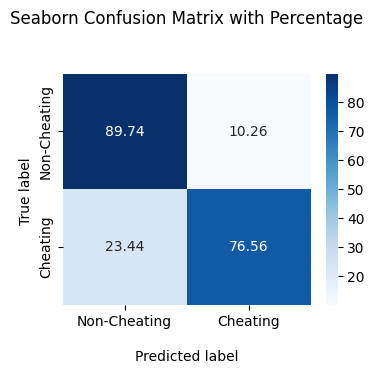

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have y_test1 and y_pred1 defined
f,ax = plt.subplots(figsize=(4,3))
# Generate the confusion matrix
cm1 = confusion_matrix(y_test2, y_pred2)

# Calculate the percentages
cm1_percent = cm1 / cm1.sum(axis=1)[:, np.newaxis] * 100

# Create the heatmap
ax = sns.heatmap(cm1_percent, annot=True, cmap=plt.cm.Blues, fmt='.2f')

# Set the title and labels
ax.set_title('Seaborn Confusion Matrix with Percentage\n\n')
ax.set_xlabel('\nPredicted label')
ax.set_ylabel('True label ')

# Set tick labels
ax.xaxis.set_ticklabels(['Non-Cheating', 'Cheating'])
ax.yaxis.set_ticklabels(['Non-Cheating', 'Cheating'])

# Display the visualization of the Confusion Matrix with percentage
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test2, y_pred2))

0.8456973293768546


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train2, my_model2.predict(X_train2)))

0.9783783783783784


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
print("precision=",precision_score(y_test2, y_pred2),",","recall=",recall_score(y_test2, y_pred2),",","f1_score=",f1_score(y_test2, y_pred2))

precision= 0.8282208588957055 , recall= 0.7655954631379962 , f1_score= 0.7956777996070726


Specificity in Python

In [ ]:
true_negatives2 = cm2[0, 0]
false_positives2 = cm2[0, 1]
print('specificity=',true_negatives2 / (true_negatives2 + false_positives2))

specificity= 0.8974358974358975


# 3.Weighted average accuracy

In [ ]:
acc1=accuracy_score(y_test1, y_pred1)
w1=my_model1.feature_importances_
wa1=np.mean(w1)
acc2=accuracy_score(y_test2, y_pred2)
w2=my_model2.feature_importances_
wa2=np.mean(w2)

In [ ]:
avrg=((acc1*wa1)+(acc2*wa2))/(wa1+wa2)

In [ ]:
avrg

0.7857221798429574